In [224]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_simulation(df: pd.DataFrame):
  # Create a figure with multiple subplots
  fig, axs = plt.subplots(6, 1, figsize=(14, 20), sharex=True)
  plt.style.use('default')
  #{'mpl20': 'default', 'mpl15': 'classic'}

  # Plot Bid, Ask, and Price
  axs[0].plot(df.index, df['Bid'], label='Bid', color='blue', linewidth=1)
  axs[0].plot(df.index, df['Ask'], label='Ask', color='red', linewidth=1)
  axs[0].plot(df.index, df['Price'], label='Price', color='black', linewidth=1)
  axs[0].set_ylabel('Price')
  axs[0].set_title('Bid, Ask, and Price')
  axs[0].legend()
  axs[0].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
  axs[0].set_xlabel('Time')


  # Plot Cash and Inventory
  axs[1].plot(df.index, df['Cash'], label='Cash', color='green', linewidth=1)
  axs[1].set_ylabel('Cash')
  ax2 = axs[1].twinx()
  ax2.plot(df.index, df['Inventory'], label='Inventory', color='orange', linewidth=1)
  ax2.set_ylabel('Inventory')
  axs[1].set_title('Cash and Inventory')
  axs[1].legend(loc='upper left')
  ax2.legend(loc='upper right')
  axs[1].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
  axs[1].set_xlabel('Time')


  # Plot Spread and Skew
  axs[2].plot(df.index, df['Spread'], label='Spread', color='red', linewidth=1)
  ax4 = axs[2].twinx()
  ax4.plot(df.index, df['Skew'], label='Skew', color='blue', linewidth=1)
  axs[2].set_ylabel('Spread')
  ax4.set_ylabel('Skew')
  axs[2].set_title('Spread and Skew')
  axs[2].legend(loc='upper left')
  ax4.legend(loc='upper right')
  axs[2].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
  axs[2].set_xlabel('Time')

  # Plot PnL
  axs[3].plot(df.index, df['PnL'], label='PnL', color='purple', linewidth=1)
  axs[3].set_ylabel('PnL')
  axs[3].set_title('PnL')
  axs[3].legend()
  axs[3].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
  axs[3].set_xlabel('Time')

  # Plot Noise, Informed
  axs[4].plot(df.index, df['Noise Trades'], label='Noise Trades', color='Orange', linewidth=1)
  axs[4].plot(df.index, df['Informed Trades'], label='Informed Trades', color='Red', linewidth=1)
  axs[4].set_ylabel('Cumulative Traders')
  axs[4].set_title('Noise and Informed Traders')
  axs[4].legend()
  axs[4].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
  axs[4].set_xlabel('Time')


  # Plot Volume Imbalance
  axs[5].plot(df.index, df['Trade Imbalance'], label='Volume Imbalance', color='blue', linewidth=1)
  axs[5].set_ylabel('Volume')
  axs[5].set_title('Volume Imbalance')
  axs[5].legend()
  axs[5].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
  axs[5].set_xlabel('Time')


  # Adjust layout
  plt.tight_layout()
  plt.show()

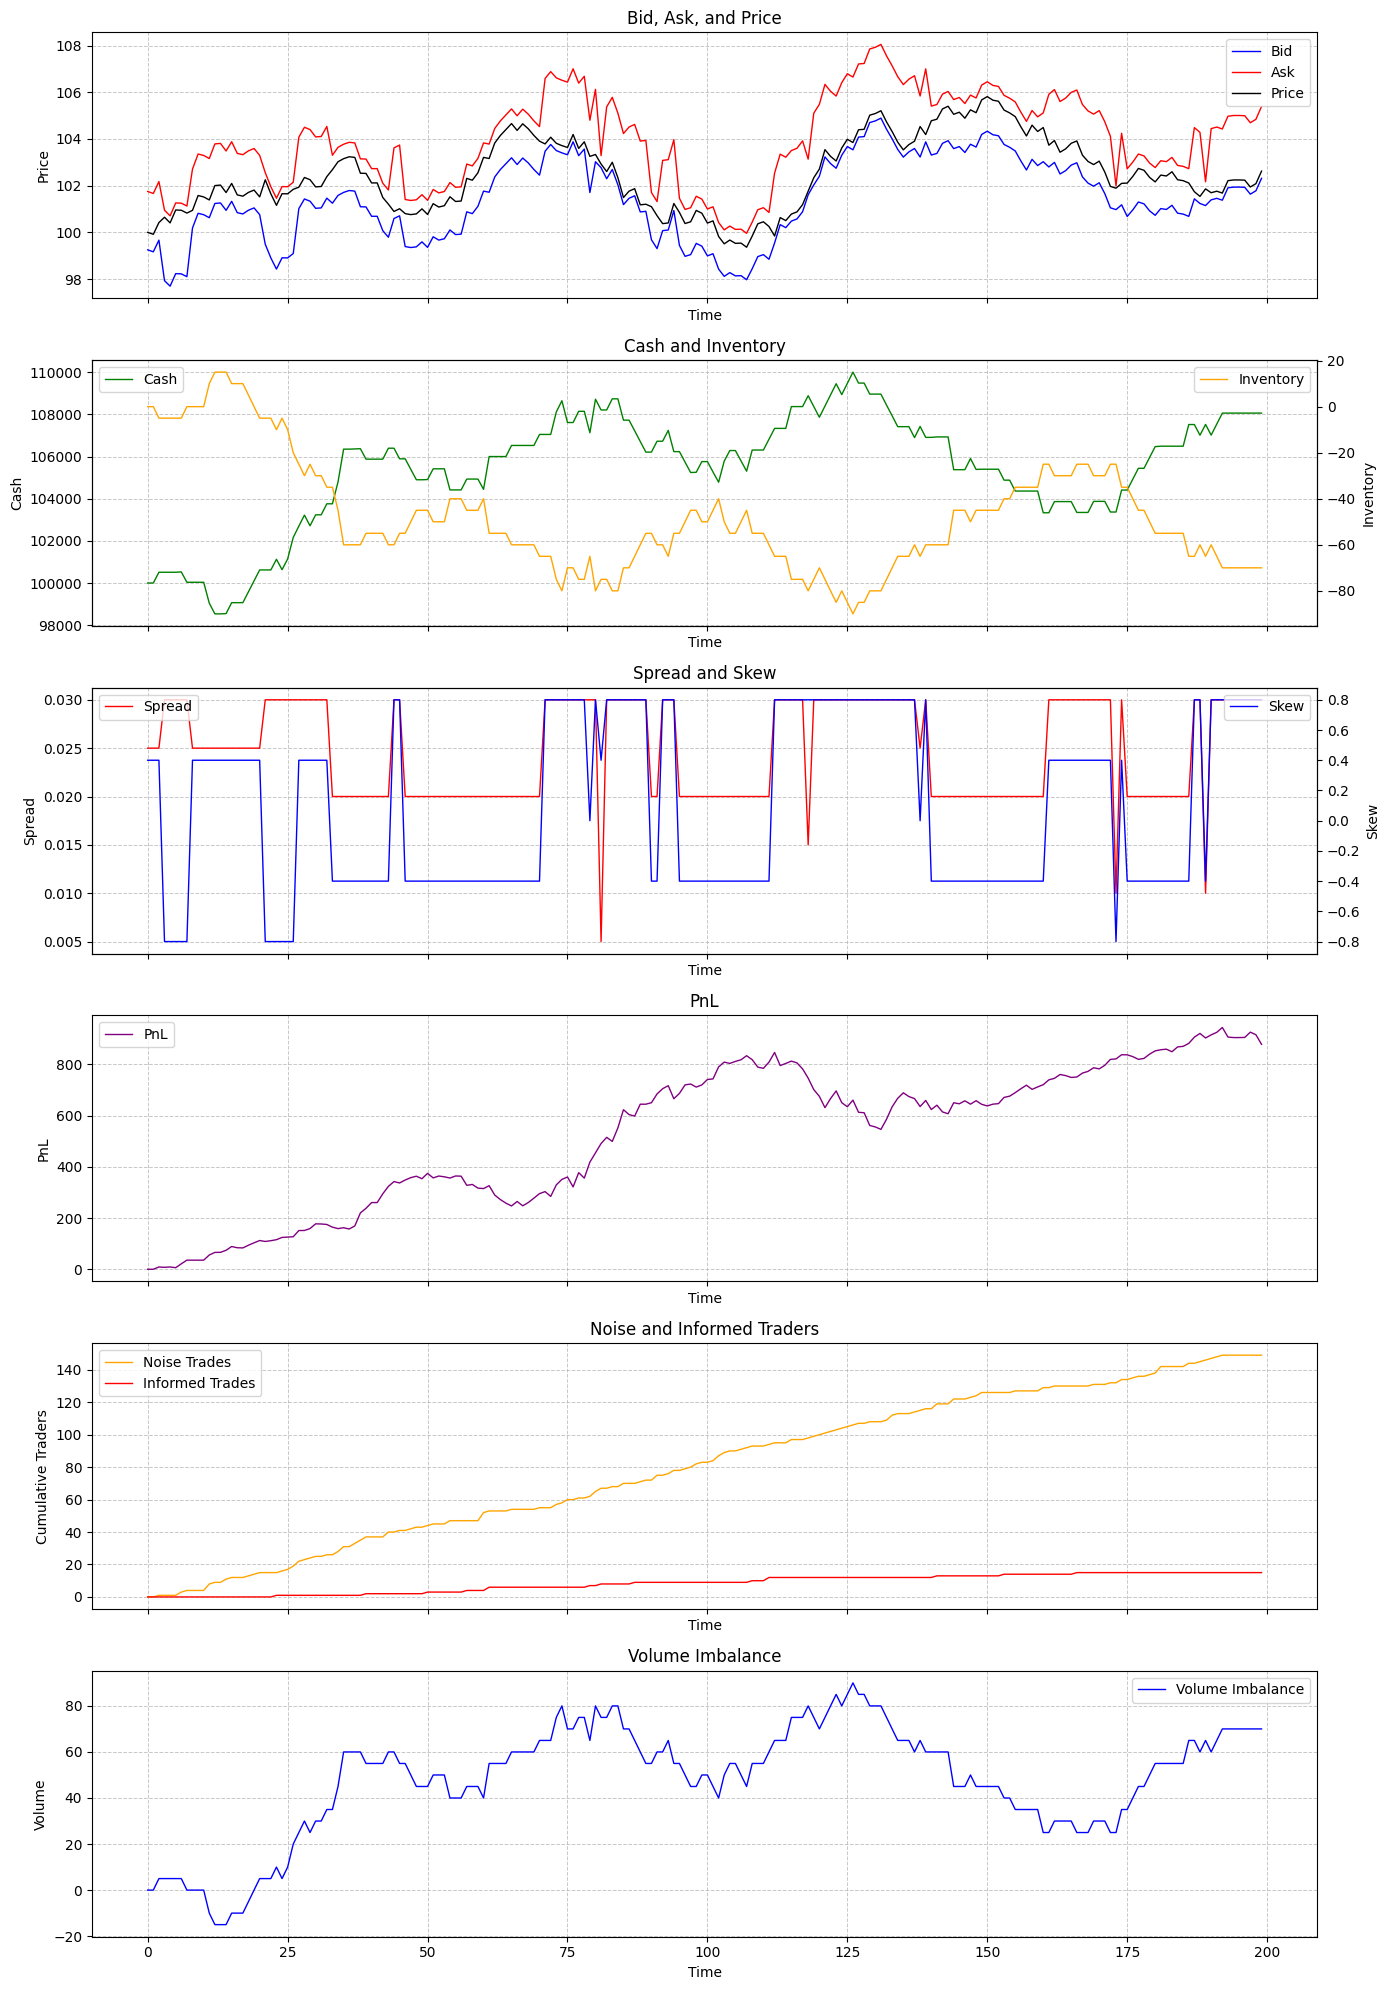

In [339]:

# Load the data
df = pd.read_csv('../data/11-08-2024_14:53/DQN/liquid/market_sim_render.csv')
plot_simulation(df)


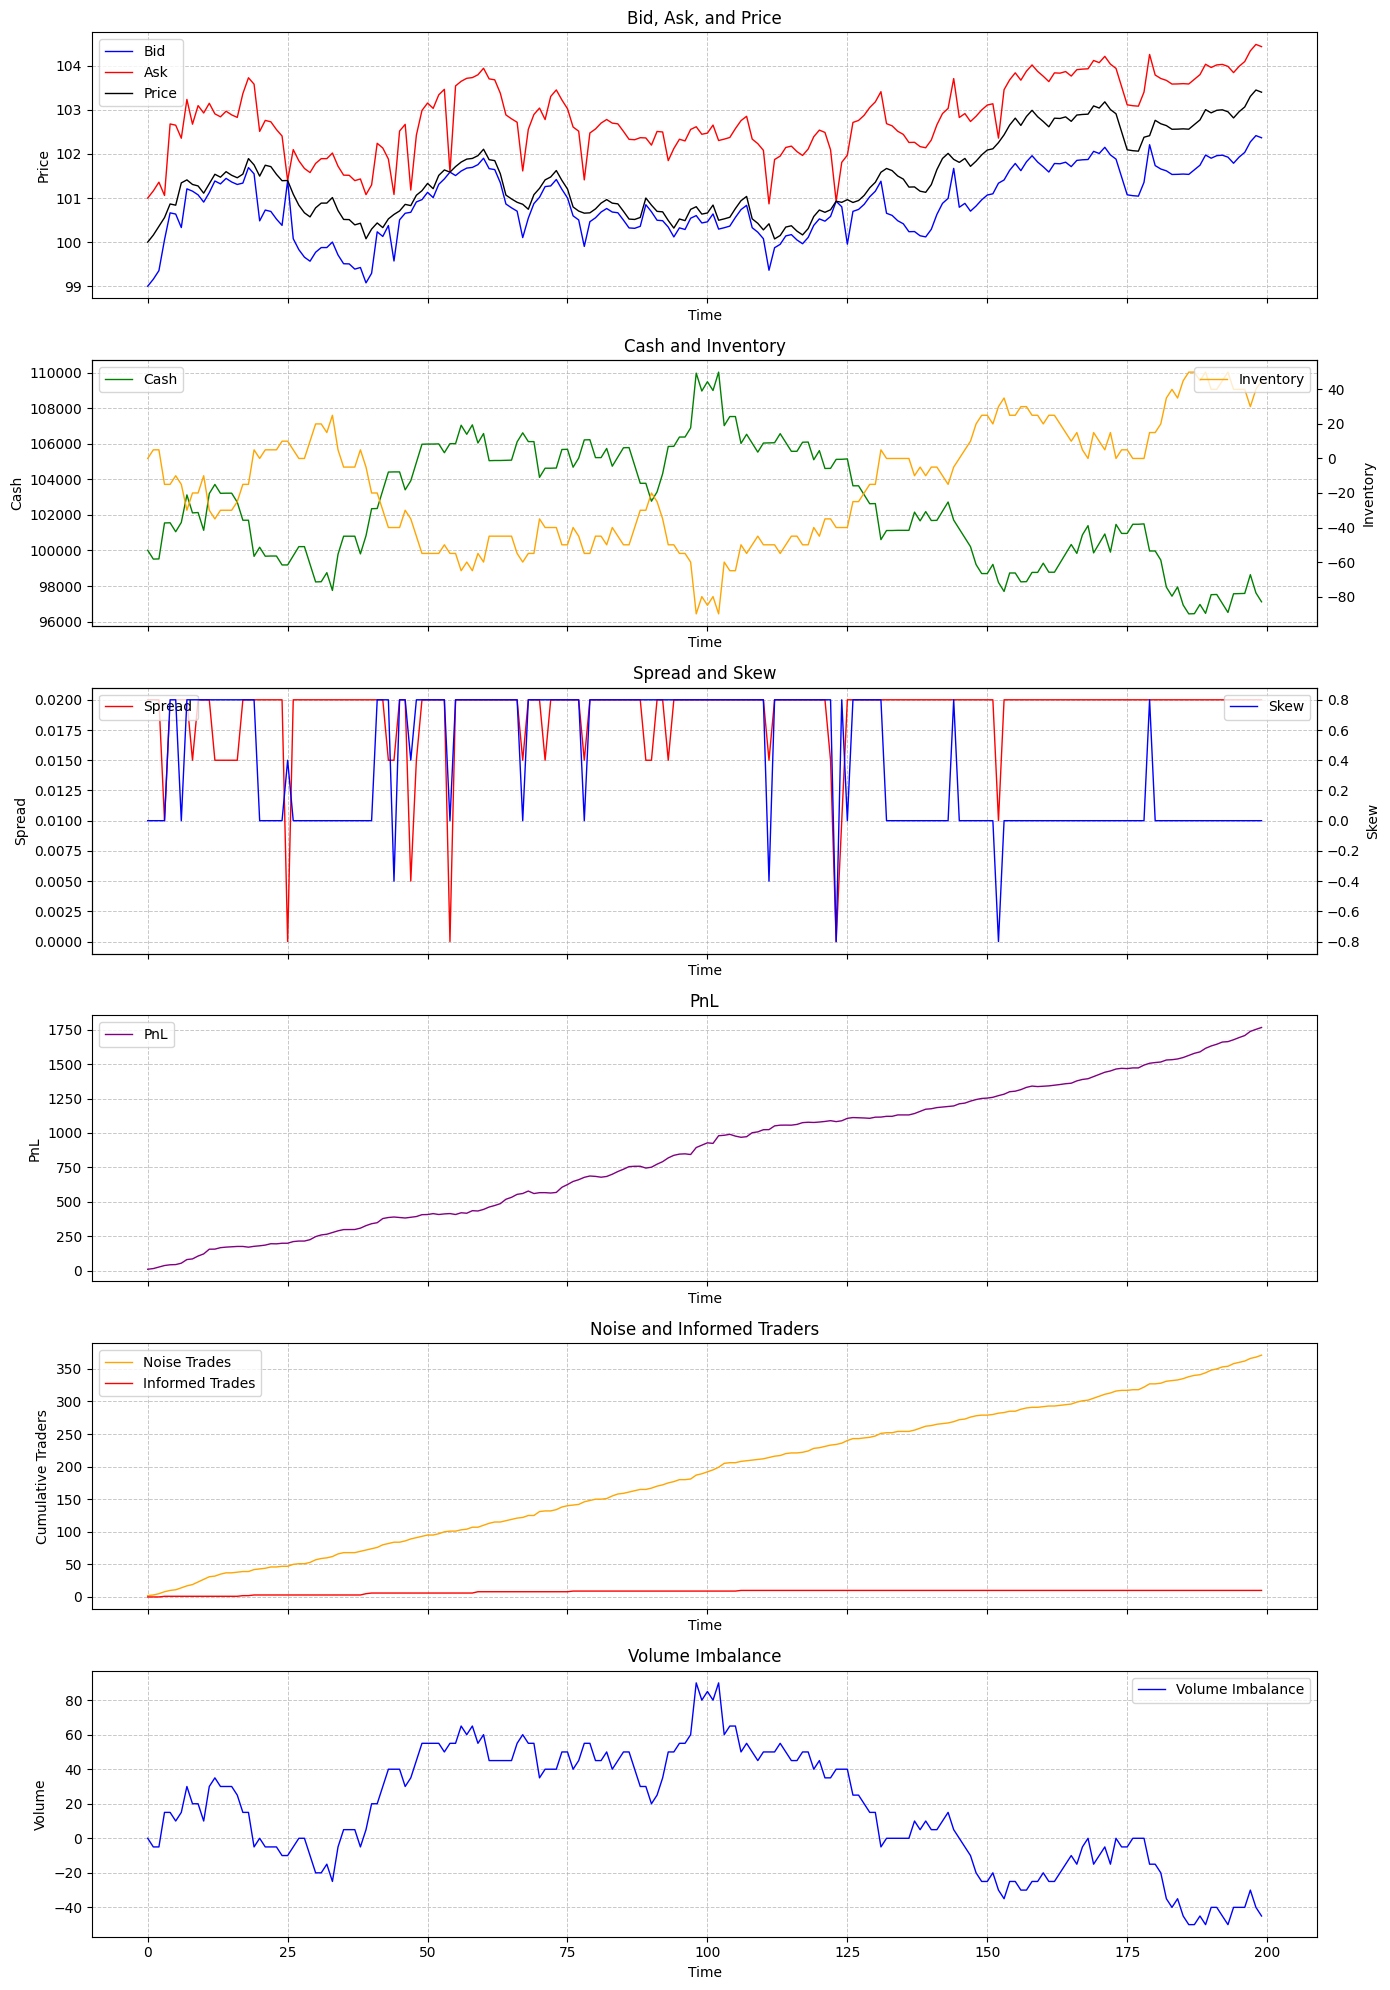

In [344]:

# Load the data
df = pd.read_csv('../data/12-08-2024_14:38/liquid/DQN/liquid/market_sim_render.csv')
plot_simulation(df)


# Mean absolute position


In [340]:
import pandas as pd

def print_performance():
    training_date = '12-08-2024_14:38'
    models = ['DQN', 'A2C', 'PPO']
    markets = ['liquid']

    for market in markets:
        for model in models:
            df = pd.read_csv(f'../data/{training_date}/liquid/{model}/{market}/market_sim_render.csv')

            map_value = df['Inventory'].abs().mean()
            pnl = str(df['PnL'].iloc[-1])
            performance_value =  str((df['PnL'].iloc[-1] / map_value))
            spread = str(df['Spread'].mean())
            correlation_skew_trade = df['Skew'].corr(df['Trade Imbalance'])
            print(f'{model}/{market}: {pnl} {map_value} {performance_value} {spread} {correlation_skew_trade}')

print_performance()



DQN/liquid: 1766.038250787053 31.075 56.83148031494941 0.019049999999999997 0.7271267811761086
A2C/liquid: 1890.4671957980024 34.575 54.677286935589365 0.019499999999999997 0.462905979986162
PPO/liquid: 1885.562999183894 34.625 54.456693117224376 0.019475 0.004147664326934316


In [266]:
import pandas as pd

def print_performance():
    training_date = '12-08-2024_13:04'
    models = ['A2C']#['DQN', 'A2C', 'PPO']
    #markets = ['liquid', 'illiquid']
    markets = ['itp/0.1', 'itp/0.2', 'itp/0.3', 'itp/0.4', 'itp/0.5', 'itp/0.6', 'itp/0.7', 'itp/0.8', 'itp/0.9', 'itp/1']
    for market in markets:
        for model in models:
            df = pd.read_csv(f'../data/{training_date}/{model}/{market}/market_sim_render.csv')
            correlation_skew_trade = df['Skew'].corr(df['Trade Imbalance'])
            map_value = df['Inventory'].abs().mean()
            pnl = str(df['PnL'].iloc[-1])
            performance_value =  str((df['PnL'].iloc[-1] / map_value))
            spread = str(df['Spread'].mean())

            print(f'{model}/{market}: {pnl} {map_value} {performance_value} {spread} {correlation_skew_trade}')# {str(df['Skew'].mean())}')


print_performance()



A2C/itp/0.1: 438.25674337240343 23.2 18.890376869500148 0.020999999999999998 -0.059827421121597196
A2C/itp/0.2: 947.1013194526022 44.95 21.07010721807791 0.028149999999999998 0.04960635187418613
A2C/itp/0.3: 582.1308452379453 40.7 14.302969170465486 0.020799999999999992 0.525163088159202
A2C/itp/0.4: 540.62681824436 24.05 22.47928558188607 0.022550000000000008 0.06763204184312772
A2C/itp/0.5: 751.022610754575 32.55 23.07289126742166 0.0262 0.09901689238698917
A2C/itp/0.6: 453.7416342711949 25.75 17.621034340628928 0.02575 0.29903831173549655
A2C/itp/0.7: 638.6831720781338 32.25 19.80412936676384 0.023 -0.0950913832178161
A2C/itp/0.8: 500.542089081544 19.5 25.66882508110482 0.029500000000000002 -0.1987143303210798
A2C/itp/0.9: 511.1285628393525 18.4 27.778726241269162 0.029699999999999997 -0.0810129178434471
A2C/itp/1: 733.8589279174776 42.8 17.146236633585925 0.021599999999999998 0.18815668695840024
